In [1]:
import os
import sys
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from PIL import Image

def make_interpolated_image(nsamples):
    """Make an interpolated image from a random selection of pixels.

    Take nsamples random pixels from im and reconstruct the image using
    scipy.interpolate.griddata.

    """

    ix = np.random.randint(im.shape[1], size=nsamples)
    iy = np.random.randint(im.shape[0], size=nsamples)
    samples = im[iy,ix]
    int_im = griddata((iy, ix), samples, (Y, X))
    return int_im

# Read in image and convert to greyscale array object
img_name = sys.argv[1]
im = Image.open(img_name)
im = np.array(im.convert('L'))

# A meshgrid of pixel coordinates
nx, ny = im.shape[1], im.shape[0]
X, Y = np.meshgrid(np.arange(0, nx, 1), np.arange(0, ny, 1))

# Create a figure of nrows x ncols subplots, and orient it appropriately
# for the aspect ratio of the image.
nrows, ncols = 2, 2
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6,4), dpi=100)
if nx < ny:
    w, h = fig.get_figwidth(), fig.get_figheight()
    fig.set_figwidth(h), fig.set_figheight(w)

# Convert an integer i to coordinates in the ax array
get_indices = lambda i: (i // nrows, i % ncols)

# Sample 100, 1,000, 10,000 and 100,000 points and plot the interpolated
# images in the figure
for i in range(4):
    nsamples = 10**(i+2)
    axes = ax[get_indices(i)]
    axes.imshow(make_interpolated_image(nsamples),
                          cmap=plt.get_cmap('Greys_r'))
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title('nsamples = {0:d}'.format(nsamples))
filestem = os.path.splitext(os.path.basename(img_name))[0]
plt.savefig('{0:s}_interp.png'.format(filestem), dpi=100)

FileNotFoundError: [Errno 2] No such file or directory: '-f'

In [6]:
import pandas as pd
data= pd.read_csv('SG_plot.csv')
data.head()


,X,Y,Color
0,0.019452,0.180548,0.000451
1,0.036040,0.180950,0.000609
2,0.019862,0.171078,0.000570
3,0.028643,0.162951,0.000808
4,0.020107,0.165363,0.000640


In [11]:
x=data['X']
y=data['Y']
z=data['Color']

(array([[ 9.,  1.,  4.,  4.,  6.,  8.,  4.,  5.,  8.,  7.],
        [ 4.,  0.,  5.,  2.,  1.,  4.,  3.,  4., 11., 10.],
        [ 6.,  0.,  3.,  2.,  1.,  3.,  1.,  4., 12.,  6.],
        [ 3.,  1.,  2.,  0.,  3.,  0.,  5.,  3.,  9.,  9.],
        [ 6.,  0.,  5.,  0.,  0.,  3.,  4.,  5., 10., 10.],
        [ 4.,  3.,  5.,  2.,  0.,  7.,  4.,  4., 11., 12.],
        [ 3.,  2.,  3.,  1.,  1.,  2.,  3.,  3., 12., 10.],
        [ 6.,  1.,  3.,  1.,  1.,  3.,  3.,  6., 16., 14.],
        [ 4.,  3.,  5.,  0.,  3.,  3.,  3.,  4.,  5.,  8.],
        [ 5.,  2.,  5.,  4.,  5.,  7., 13.,  2.,  8.,  7.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ]),
 <matplotlib.collections.QuadMesh at 0x25b38b80c18>)

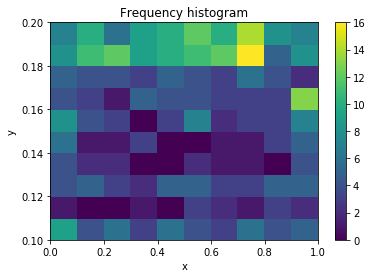

In [16]:
h =plt.hist2d(x, y)
plt.colorbar(h[3])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Frequency histogram')
h